# 01 Neural Networks - Basic Fraud Detection 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model


In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

We will be using the Credit Card Fraud Detection data set available at https://www.kaggle.com/mlg-ulb/creditcardfraud.   The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

This data set is of interest precisely because it is unbalanced, since it is like the distribution that is typical in a Tax Administration, where the vast majority of taxpayers are not defrauding the Tax Administration. We are likely to see a similar distribution.



In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('creditcard.csv')
raw_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
raw_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
cleaned_df = raw_df.copy()

# We don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


We have a data set with 284,807 labeled data points.  We will use 80% of this data to train our models, and we use the remaining 20% to test and validate our models.  Since the data set is unbalanced, we need a sufficiently large set for the Test set, so an 80-2o split seems reasonable.

Use a utility from sklearn to split and shuffle our dataset

In [6]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)


Examine the data


In [7]:
neg_tot, pos_tot = np.bincount(raw_df['Class'])
total_tot = neg_tot + pos_tot
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_tot, pos_tot, 100 * pos_tot / total_tot))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



We want to make sure that our train data. test data and validation data maintain the ratio of 0.17% of total positives

In [8]:
neg_train, pos_train = np.bincount(train_df['Class'])
total_train = neg_train + pos_train
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_train, pos_train, 100 * pos_train / total_train))

Examples:
    Total: 182276
    Positive: 323 (0.18% of total)



In [9]:
neg_test, pos_test = np.bincount(test_df['Class'])
total_test = neg_test + pos_test
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_test, pos_test, 100 * pos_test / total_test))

Examples:
    Total: 56962
    Positive: 102 (0.18% of total)



In [10]:
neg_val, pos_val = np.bincount(val_df['Class'])
total_val = neg_val + pos_val
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_val, pos_val, 100 * pos_val / total_val))

Examples:
    Total: 45569
    Positive: 67 (0.15% of total)



In [11]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0

val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

If our data set has some numbers in widely different scales, our models will not work, since variables that have very large range will overpower variables that have smaller ranges.  For this, we scale the data.

We scale each variable by calculating:

z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the training samples.

In [12]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

Our data should have a mean of zero and a standard deviation of 1. 

In [13]:
pd.DataFrame(train_features).describe()

0             1             2             3             4   \
count  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean  -2.136197e-17  2.182975e-18  1.192840e-17 -1.044709e-17 -1.559268e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.880139e+01 -4.411951e+01 -3.171231e+01 -4.009185e+00 -8.149213e+01   
25%   -4.710900e-01 -3.642734e-01 -5.866216e-01 -5.992646e-01 -4.951999e-01   
50%    9.149177e-03  3.919803e-02  1.205464e-01 -1.300724e-02 -3.889443e-02   
75%    6.708185e-01  4.860497e-01  6.762956e-01  5.233381e-01  4.397560e-01   
max    1.252252e+00  1.338521e+01  6.160180e+00  1.164691e+01  2.493357e+01   

                 5             6             7             8             9   \
count  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean  -2.268735e-17  8.575973e-19  3.118536e-19  1.855529e-17 -3.196499e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.953184e+01 -3.460060e+01 -4.228326e+01 -1.222842e+01 -2.262013e+01   
25%   -5.737924e-01 -4.400248e-01 -1.742237e-01 -5.842463e-01 -4.929558e-01   
50%   -2.031511e-01  3.148732e-02  1.844617e-02 -4.569848e-02 -8.381583e-02   
75%    2.971426e-01  4.537409e-01  2.740602e-01  5.446359e-01  4.202476e-01   
max    5.472908e+01  9.579346e+01  1.669014e+01  1.420039e+01  2.184765e+01   

       ...            19            20            21            22  \
count  ...  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean   ... -6.120126e-18 -6.938742e-18 -7.445504e-18 -7.874302e-18   
std    ...  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min    ... -7.077644e+01 -3.087871e+01 -1.225615e+01 -5.885189e+01   
25%    ... -2.756418e-01 -3.090633e-01 -7.476022e-01 -2.596526e-01   
50%    ... -8.166334e-02 -4.059498e-02  8.902491e-03 -1.846353e-02   
75%    ...  1.729048e-01  2.494121e-01  7.287188e-01  2.368049e-01   
max    ...  3.407373e+01  3.669401e+01  1.153081e+01  3.615937e+01   

                 23            24            25            26            27  \
count  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean  -1.910103e-17 -4.093078e-18  1.567064e-17  1.832140e-18  1.851630e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -4.672621e+00 -1.668743e+01 -4.645888e+00 -5.554939e+01 -4.573573e+01   
25%   -5.841817e-01 -6.086713e-01 -6.784966e-01 -1.727124e-01 -1.570101e-01   
50%    6.848814e-02  3.273560e-02 -1.095511e-01  4.165853e-03  3.304096e-02   
75%    7.259687e-01  6.745470e-01  4.999225e-01  2.254704e-01  2.316664e-01   
max    7.555136e+00  1.443027e+01  7.173174e+00  7.782338e+01  1.003268e+02   

                 28  
count  1.822760e+05  
mean  -2.709618e-16  
std    1.000003e+00  
min   -4.870188e+00  
25%   -6.067570e-01  
50%    7.350568e-02  
75%    6.973875e-01  
max    3.563252e+00  

[8 rows x 29 columns]

We remove outliers to train our model.  

In [14]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

In [15]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


Logistic regression minimizes the following cost function:
$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $

In [16]:
clf = linear_model.LogisticRegression(random_state=0).fit(train_features, train_labels)

In [17]:
clf.score(test_features, test_labels)

0.9995435553526912

This seems like an amazing result.  99.94% accuracy.  But remember that our data has 0.17% cases of fraud.  This means that if we just guess 0 (no fraud) all the time, we will still get 99.83% accuracy.  So, accuracy is not a great benchmark for our task.

In [18]:
predictions = clf.predict(test_features)

In [19]:
def plotConfusion(test_labels, predictions_baseline, p):
    cm = confusion_matrix(test_labels, predictions_baseline > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(0.5))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    truePositives = cm[1][1]
    trueNegatives = cm[0][0]
    falsePositives = cm[0][1]
    falseNegatives = cm[1][0]
    
    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)
    f1ScoreCalculated =  2 * (precision * recall) / (precision + recall)
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score Calculated: {:.4f}'.format(f1ScoreCalculated))
    
    

A confusion matrix and an F1 score are better mechanisms for measuring the effectiveness of the model.    A confusion matrix allows us to visualize how many True Negatives, False Positives, False Negatives and True Positives we have.  100% accuracy would mean 0 False Negatives and 0 False Positives.

We can also use Precision, Recall and F1 scores. 

Precision is the proportion of positive identifications that was actually correct.  

Recall is the proportion of actual positives that was identified correctly.

F1 score is a single metric that is useful if you're looking for a balance between precision and recall and there's an uneven class distribution. The formula for F1 is $F_{1}=\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$



Legitimate Transactions Detected (True Negatives):  56857
Legitimate Transactions Incorrectly Detected (False Positives):  3
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  79
Total Fraudulent Transactions:  102
Precision: 0.9634
Recall: 0.7745
F1 Score Calculated: 0.8587


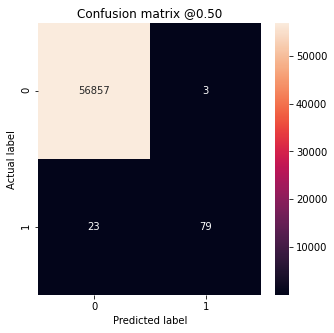

In [20]:
plotConfusion(test_labels, predictions, 0.5)

In [21]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

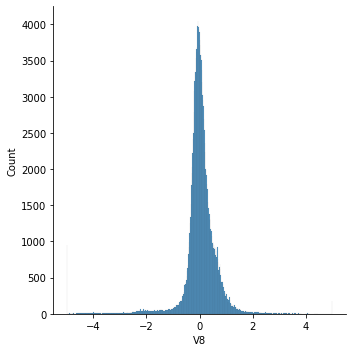

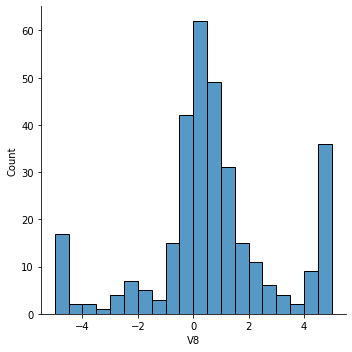

In [22]:
sns.displot(neg_df['V8'])
sns.displot(pos_df['V8'])

Text(0.5, 0.98, 'Negative distribution')

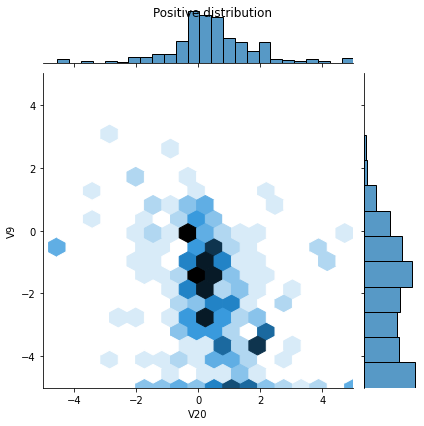

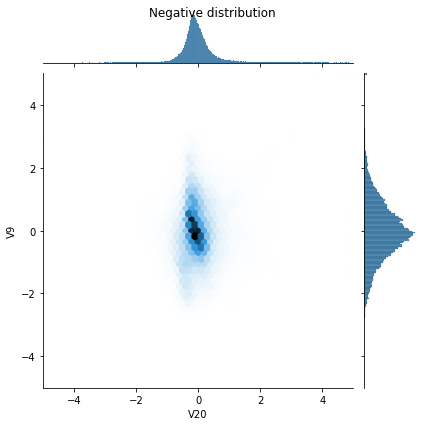

In [23]:
sns.jointplot(x=pos_df['V20'], y=pos_df['V9'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V20'], y=neg_df['V9'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Negative distribution")

In [24]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

We got an F1 score of 82% using Logistic Regression.   We may be able to do better with a Neural Network.  Start small, with a simple neural network that has a 5 node hidden layer and one output node.  We will train it for 5 epochs. 

In [25]:
basic_model = keras.Sequential(
    [
        layers.Dense(5, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

basic_model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)

basic_results = basic_model.fit(train_features, train_labels, batch_size=64, epochs = 5, verbose=2)

C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/5
2849/2849 - 2s - loss: 0.0119 - accuracy: 0.9972
Epoch 2/5
2849/2849 - 2s - loss: 0.0035 - accuracy: 0.9993
Epoch 3/5
2849/2849 - 2s - loss: 0.0034 - accuracy: 0.9993
Epoch 4/5
2849/2849 - 2s - loss: 0.0031 - accuracy: 0.9994
Epoch 5/5
2849/2849 - 2s - loss: 0.0031 - accuracy: 0.9994


In [26]:
basic_test_results = basic_model.evaluate(test_features, test_labels, batch_size=512, verbose=2)
print("Results = "+str(basic_test_results))

112/112 - 0s - loss: 0.0037 - accuracy: 0.9994
Results = [0.003742585191503167, 0.9994382262229919]


Legitimate Transactions Detected (True Negatives):  56849
Legitimate Transactions Incorrectly Detected (False Positives):  11
Fraudulent Transactions Missed (False Negatives):  21
Fraudulent Transactions Detected (True Positives):  81
Total Fraudulent Transactions:  102
Precision: 0.8804
Recall: 0.7941
F1 Score Calculated: 0.8351


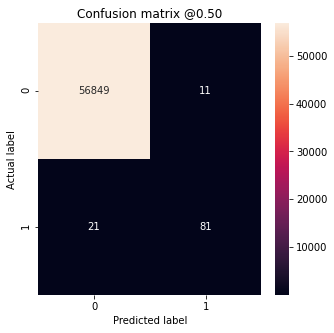

In [27]:
basic_predictions_baseline = basic_model.predict(test_features, batch_size=512)
plotConfusion(test_labels, basic_predictions_baseline, 0.5)

In [28]:
basic_predictions_baseline = basic_model.predict(test_features, batch_size=512)

This is not better than Logistic Regression.   Our network is small and we trained it for only 5 epochs.   Lets try with somethying bigger and training it for longer.

In [29]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

medium_model = keras.Sequential(
    [
        layers.Dense(10, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

medium_model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.01),
    metrics=METRICS
)

medium_results = medium_model.fit(train_features, train_labels, batch_size=512, epochs = 50, \
                                  verbose=2, validation_data=(test_features, test_labels))

C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/50
357/357 - 3s - loss: 0.0452 - tp: 129.0000 - fp: 2659.0000 - tn: 179294.0000 - fn: 194.0000 - accuracy: 0.9843 - precision: 0.0463 - recall: 0.3994 - auc: 0.8762 - prc: 0.0997 - val_loss: 0.0043 - val_tp: 77.0000 - val_fp: 7.0000 - val_tn: 56853.0000 - val_fn: 25.0000 - val_accuracy: 0.9994 - val_precision: 0.9167 - val_recall: 0.7549 - val_auc: 0.9200 - val_prc: 0.7545
Epoch 2/50
357/357 - 1s - loss: 0.0040 - tp: 252.0000 - fp: 47.0000 - tn: 181906.0000 - fn: 71.0000 - accuracy: 0.9994 - precision: 0.8428 - recall: 0.7802 - auc: 0.9272 - prc: 0.7165 - val_loss: 0.0040 - val_tp: 80.0000 - val_fp: 9.0000 - val_tn: 56851.0000 - val_fn: 22.0000 - val_accuracy: 0.9995 - val_precision: 0.8989 - val_recall: 0.7843 - val_auc: 0.9202 - val_prc: 0.7447
Epoch 3/50
357/357 - 1s - loss: 0.0035 - tp: 256.0000 - fp: 53.0000 - tn: 181900.0000 - fn: 67.0000 - accuracy: 0.9993 - precision: 0.8285 - recall: 0.7926 - auc: 0.9430 - prc: 0.7609 - val_loss: 0.0038 - val_tp: 80.0000 - val_fp: 9.00

Epoch 23/50
357/357 - 1s - loss: 0.0017 - tp: 258.0000 - fp: 36.0000 - tn: 181917.0000 - fn: 65.0000 - accuracy: 0.9994 - precision: 0.8776 - recall: 0.7988 - auc: 0.9780 - prc: 0.8924 - val_loss: 0.0049 - val_tp: 77.0000 - val_fp: 4.0000 - val_tn: 56856.0000 - val_fn: 25.0000 - val_accuracy: 0.9995 - val_precision: 0.9506 - val_recall: 0.7549 - val_auc: 0.9011 - val_prc: 0.7818
Epoch 24/50
357/357 - 1s - loss: 0.0017 - tp: 263.0000 - fp: 33.0000 - tn: 181920.0000 - fn: 60.0000 - accuracy: 0.9995 - precision: 0.8885 - recall: 0.8142 - auc: 0.9842 - prc: 0.9067 - val_loss: 0.0055 - val_tp: 78.0000 - val_fp: 8.0000 - val_tn: 56852.0000 - val_fn: 24.0000 - val_accuracy: 0.9994 - val_precision: 0.9070 - val_recall: 0.7647 - val_auc: 0.8917 - val_prc: 0.7743
Epoch 25/50
357/357 - 1s - loss: 0.0018 - tp: 260.0000 - fp: 33.0000 - tn: 181920.0000 - fn: 63.0000 - accuracy: 0.9995 - precision: 0.8874 - recall: 0.8050 - auc: 0.9873 - prc: 0.8997 - val_loss: 0.0051 - val_tp: 76.0000 - val_fp: 4.00

Epoch 45/50
357/357 - 1s - loss: 0.0013 - tp: 270.0000 - fp: 34.0000 - tn: 181919.0000 - fn: 53.0000 - accuracy: 0.9995 - precision: 0.8882 - recall: 0.8359 - auc: 0.9905 - prc: 0.9297 - val_loss: 0.0077 - val_tp: 77.0000 - val_fp: 12.0000 - val_tn: 56848.0000 - val_fn: 25.0000 - val_accuracy: 0.9994 - val_precision: 0.8652 - val_recall: 0.7549 - val_auc: 0.9016 - val_prc: 0.7552
Epoch 46/50
357/357 - 1s - loss: 0.0013 - tp: 269.0000 - fp: 35.0000 - tn: 181918.0000 - fn: 54.0000 - accuracy: 0.9995 - precision: 0.8849 - recall: 0.8328 - auc: 0.9905 - prc: 0.9255 - val_loss: 0.0072 - val_tp: 79.0000 - val_fp: 16.0000 - val_tn: 56844.0000 - val_fn: 23.0000 - val_accuracy: 0.9993 - val_precision: 0.8316 - val_recall: 0.7745 - val_auc: 0.9012 - val_prc: 0.7639
Epoch 47/50
357/357 - 1s - loss: 0.0015 - tp: 273.0000 - fp: 33.0000 - tn: 181920.0000 - fn: 50.0000 - accuracy: 0.9995 - precision: 0.8922 - recall: 0.8452 - auc: 0.9890 - prc: 0.9188 - val_loss: 0.0072 - val_tp: 77.0000 - val_fp: 13

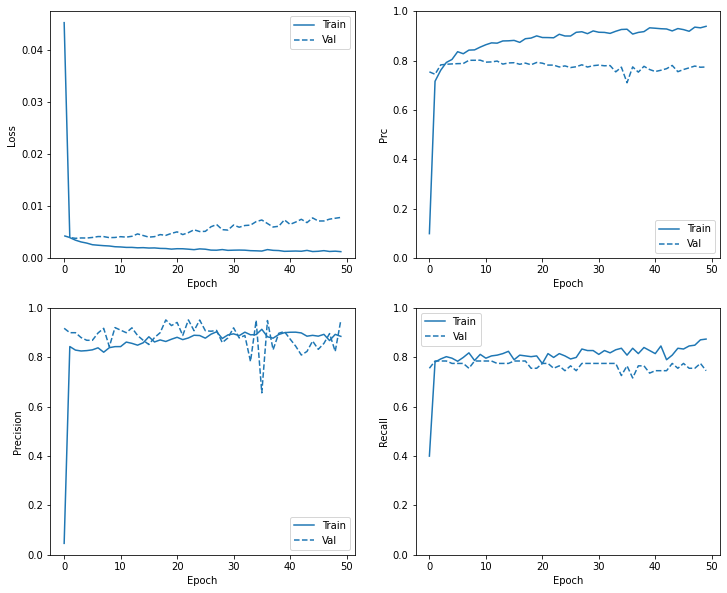

In [30]:
plot_metrics(medium_results)

In [31]:
medium_predictions_baseline = medium_model.predict(test_features, batch_size=512)

Legitimate Transactions Detected (True Negatives):  56856
Legitimate Transactions Incorrectly Detected (False Positives):  4
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  102
Precision: 0.9500
Recall: 0.7451
F1 Score Calculated: 0.8352


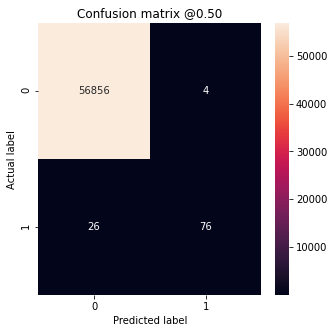

In [32]:
plotConfusion(test_labels, medium_predictions_baseline, 0.5)

Our validation error is climbing, so training this neural network for longer is not likely to help much. We are overfitting the data.  We will train a slightly larger network but we will add regularization to try to avoid overfitting.

In [33]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

medium_model2 = keras.Sequential(
    [
        layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ]
)

medium_model2.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.05),
    metrics=METRICS
)

medium_results2 = medium_model2.fit(train_features, train_labels, batch_size=512, epochs = 100, verbose=2, validation_data=(test_features, test_labels))

C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/100
357/357 - 3s - loss: 0.0291 - tp: 146.0000 - fp: 453.0000 - tn: 181500.0000 - fn: 177.0000 - accuracy: 0.9965 - precision: 0.2437 - recall: 0.4520 - auc: 0.9005 - prc: 0.4073 - val_loss: 0.0056 - val_tp: 79.0000 - val_fp: 5.0000 - val_tn: 56855.0000 - val_fn: 23.0000 - val_accuracy: 0.9995 - val_precision: 0.9405 - val_recall: 0.7745 - val_auc: 0.9104 - val_prc: 0.7444
Epoch 2/100
357/357 - 1s - loss: 0.0072 - tp: 214.0000 - fp: 37.0000 - tn: 181916.0000 - fn: 109.0000 - accuracy: 0.9992 - precision: 0.8526 - recall: 0.6625 - auc: 0.9110 - prc: 0.6690 - val_loss: 0.0092 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 56860.0000 - val_fn: 102.0000 - val_accuracy: 0.9982 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8872 - val_prc: 0.7469
Epoch 3/100
357/357 - 1s - loss: 0.0107 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 181953.0000 - fn: 323.0000 - accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8874 - prc: 0.5472 - val_loss: 0.0075

Epoch 23/100
357/357 - 1s - loss: 0.0055 - tp: 237.0000 - fp: 57.0000 - tn: 181896.0000 - fn: 86.0000 - accuracy: 0.9992 - precision: 0.8061 - recall: 0.7337 - auc: 0.9142 - prc: 0.6332 - val_loss: 0.0053 - val_tp: 72.0000 - val_fp: 6.0000 - val_tn: 56854.0000 - val_fn: 30.0000 - val_accuracy: 0.9994 - val_precision: 0.9231 - val_recall: 0.7059 - val_auc: 0.8921 - val_prc: 0.7241
Epoch 24/100
357/357 - 1s - loss: 0.0059 - tp: 224.0000 - fp: 51.0000 - tn: 181902.0000 - fn: 99.0000 - accuracy: 0.9992 - precision: 0.8145 - recall: 0.6935 - auc: 0.9112 - prc: 0.6388 - val_loss: 0.0069 - val_tp: 80.0000 - val_fp: 14.0000 - val_tn: 56846.0000 - val_fn: 22.0000 - val_accuracy: 0.9994 - val_precision: 0.8511 - val_recall: 0.7843 - val_auc: 0.8920 - val_prc: 0.6755
Epoch 25/100
357/357 - 1s - loss: 0.0061 - tp: 231.0000 - fp: 59.0000 - tn: 181894.0000 - fn: 92.0000 - accuracy: 0.9992 - precision: 0.7966 - recall: 0.7152 - auc: 0.9051 - prc: 0.6280 - val_loss: 0.0054 - val_tp: 52.0000 - val_fp: 

Epoch 45/100
357/357 - 1s - loss: 0.0053 - tp: 240.0000 - fp: 55.0000 - tn: 181898.0000 - fn: 83.0000 - accuracy: 0.9992 - precision: 0.8136 - recall: 0.7430 - auc: 0.9097 - prc: 0.6594 - val_loss: 0.0054 - val_tp: 80.0000 - val_fp: 11.0000 - val_tn: 56849.0000 - val_fn: 22.0000 - val_accuracy: 0.9994 - val_precision: 0.8791 - val_recall: 0.7843 - val_auc: 0.8921 - val_prc: 0.6992
Epoch 46/100
357/357 - 1s - loss: 0.0057 - tp: 227.0000 - fp: 54.0000 - tn: 181899.0000 - fn: 96.0000 - accuracy: 0.9992 - precision: 0.8078 - recall: 0.7028 - auc: 0.9188 - prc: 0.6553 - val_loss: 0.0056 - val_tp: 75.0000 - val_fp: 14.0000 - val_tn: 56846.0000 - val_fn: 27.0000 - val_accuracy: 0.9993 - val_precision: 0.8427 - val_recall: 0.7353 - val_auc: 0.9058 - val_prc: 0.7038
Epoch 47/100
357/357 - 1s - loss: 0.0055 - tp: 224.0000 - fp: 49.0000 - tn: 181904.0000 - fn: 99.0000 - accuracy: 0.9992 - precision: 0.8205 - recall: 0.6935 - auc: 0.9126 - prc: 0.6581 - val_loss: 0.0049 - val_tp: 79.0000 - val_fp:

Epoch 67/100
357/357 - 1s - loss: 0.0052 - tp: 238.0000 - fp: 52.0000 - tn: 181901.0000 - fn: 85.0000 - accuracy: 0.9992 - precision: 0.8207 - recall: 0.7368 - auc: 0.9218 - prc: 0.6467 - val_loss: 0.0050 - val_tp: 80.0000 - val_fp: 10.0000 - val_tn: 56850.0000 - val_fn: 22.0000 - val_accuracy: 0.9994 - val_precision: 0.8889 - val_recall: 0.7843 - val_auc: 0.9111 - val_prc: 0.7200
Epoch 68/100
357/357 - 1s - loss: 0.0053 - tp: 233.0000 - fp: 53.0000 - tn: 181900.0000 - fn: 90.0000 - accuracy: 0.9992 - precision: 0.8147 - recall: 0.7214 - auc: 0.9235 - prc: 0.6712 - val_loss: 0.0054 - val_tp: 80.0000 - val_fp: 10.0000 - val_tn: 56850.0000 - val_fn: 22.0000 - val_accuracy: 0.9994 - val_precision: 0.8889 - val_recall: 0.7843 - val_auc: 0.8921 - val_prc: 0.7041
Epoch 69/100
357/357 - 1s - loss: 0.0058 - tp: 229.0000 - fp: 48.0000 - tn: 181905.0000 - fn: 94.0000 - accuracy: 0.9992 - precision: 0.8267 - recall: 0.7090 - auc: 0.9033 - prc: 0.6589 - val_loss: 0.0053 - val_tp: 80.0000 - val_fp:

Epoch 89/100
357/357 - 1s - loss: 0.0056 - tp: 233.0000 - fp: 52.0000 - tn: 181901.0000 - fn: 90.0000 - accuracy: 0.9992 - precision: 0.8175 - recall: 0.7214 - auc: 0.9173 - prc: 0.6457 - val_loss: 0.0050 - val_tp: 81.0000 - val_fp: 14.0000 - val_tn: 56846.0000 - val_fn: 21.0000 - val_accuracy: 0.9994 - val_precision: 0.8526 - val_recall: 0.7941 - val_auc: 0.9063 - val_prc: 0.7161
Epoch 90/100
357/357 - 1s - loss: 0.0053 - tp: 231.0000 - fp: 59.0000 - tn: 181894.0000 - fn: 92.0000 - accuracy: 0.9992 - precision: 0.7966 - recall: 0.7152 - auc: 0.9127 - prc: 0.6488 - val_loss: 0.0053 - val_tp: 81.0000 - val_fp: 14.0000 - val_tn: 56846.0000 - val_fn: 21.0000 - val_accuracy: 0.9994 - val_precision: 0.8526 - val_recall: 0.7941 - val_auc: 0.9107 - val_prc: 0.7236
Epoch 91/100
357/357 - 1s - loss: 0.0052 - tp: 239.0000 - fp: 50.0000 - tn: 181903.0000 - fn: 84.0000 - accuracy: 0.9993 - precision: 0.8270 - recall: 0.7399 - auc: 0.9127 - prc: 0.6677 - val_loss: 0.0079 - val_tp: 5.0000 - val_fp: 

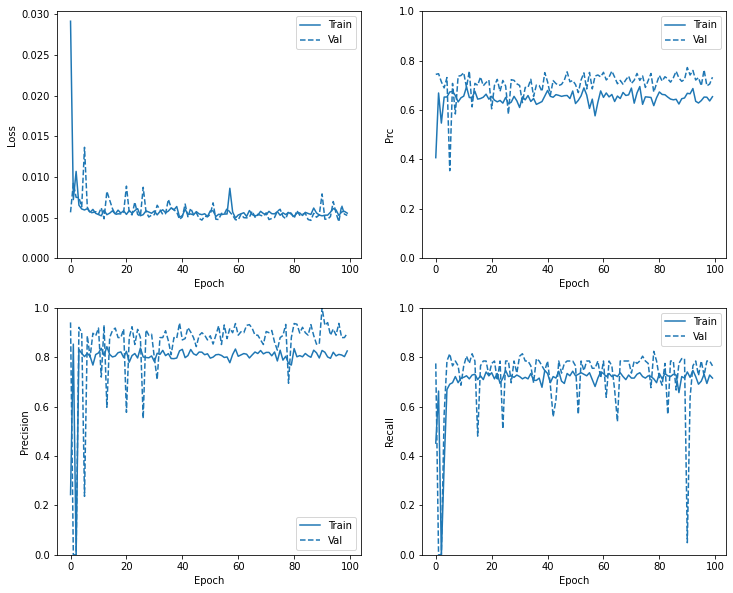

In [34]:
plot_metrics(medium_results2)

In [35]:
medium2_predictions_baseline = medium_model2.predict(test_features, batch_size=512)

Legitimate Transactions Detected (True Negatives):  56851
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  78
Total Fraudulent Transactions:  102
Precision: 0.8966
Recall: 0.7647
F1 Score Calculated: 0.8254


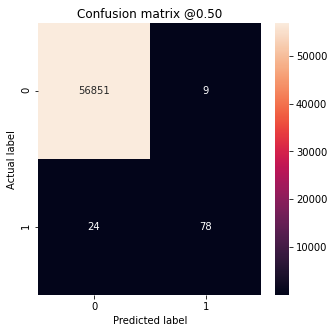

In [36]:
plotConfusion(test_labels, medium2_predictions_baseline, 0.5)

Training a neural network to detect fraud, when you have a very unbalanced data set is difficult.  We can try a larger network, or possibly train the model for longer.